In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date
import datetime as dt

sns.set_style()

In [2]:
%matplotlib inline

In [3]:
# Importando o dataset da Hamburgueria 207

df= pd.read_excel('Historico_Itens_Vendidos de 01-01-18 à 31-12-18.xls')

In [4]:
df.head()

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.
0,2018-03-05 19:03:29.296,1.0,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,6187.0,NaN,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago
1,2018-03-05 19:06:18.572,1.0,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
2,2018-03-05 19:06:24.578,1.0,3.0,3.0,Produto,COCA COLA LATA,Produto,Refrigerantes,4.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
3,2018-03-05 19:10:04.523,1.0,15.0,15.0,Produto,207 CLÁSSICO,Produto,Hambúrgueres,15.0,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago
4,2018-03-05 19:10:04.523,1.0,1.5,1.5,Complemento,QUEIJO ADICIONAL,Complemento,Complemento,1.5,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 15 columns):
Data/Hora Item      10532 non-null datetime64[ns]
Qtd.                10532 non-null float64
Valor Un. Item      10532 non-null float64
Valor. Tot. Item    10532 non-null float64
Tipo de Item        10532 non-null object
Nome Prod.          10532 non-null object
Tipo Prod.          10532 non-null object
Cat. Prod.          10532 non-null object
Valor Prod.         10532 non-null float64
Cod. Ped.           10532 non-null float64
Núm. Mesa/Com.      2267 non-null float64
Data Ab. Ped.       10532 non-null datetime64[ns]
Data Fec. Ped.      10532 non-null datetime64[ns]
Tipo Ped.           10532 non-null object
Stat. Ped.          10532 non-null object
dtypes: datetime64[ns](3), float64(6), object(6)
memory usage: 987.5+ KB


In [6]:
# Tamanho do dataframe
df.shape

(10533, 15)

In [7]:
# Valore nulos ( missings)
df.isnull().sum()

Data/Hora Item         1
Qtd.                   1
Valor Un. Item         1
Valor. Tot. Item       1
Tipo de Item           1
Nome Prod.             1
Tipo Prod.             1
Cat. Prod.             1
Valor Prod.            1
Cod. Ped.              1
Núm. Mesa/Com.      8266
Data Ab. Ped.          1
Data Fec. Ped.         1
Tipo Ped.              1
Stat. Ped.             1
dtype: int64

In [8]:
# Em percentual agora
df.isnull().sum() / df.shape[0]

Data/Hora Item      0.000095
Qtd.                0.000095
Valor Un. Item      0.000095
Valor. Tot. Item    0.000095
Tipo de Item        0.000095
Nome Prod.          0.000095
Tipo Prod.          0.000095
Cat. Prod.          0.000095
Valor Prod.         0.000095
Cod. Ped.           0.000095
Núm. Mesa/Com.      0.784772
Data Ab. Ped.       0.000095
Data Fec. Ped.      0.000095
Tipo Ped.           0.000095
Stat. Ped.          0.000095
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07516770>,
      dtype=object)

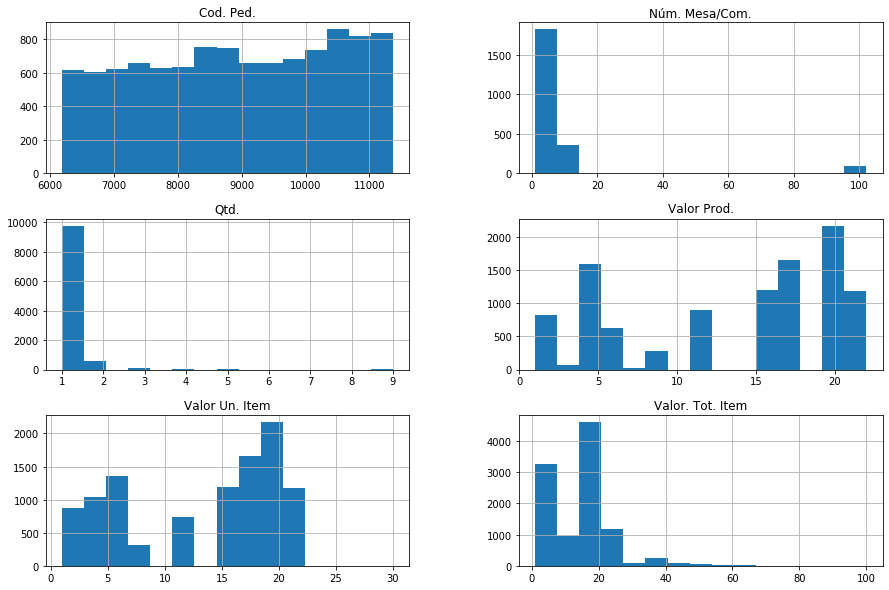

In [10]:
# Análise de variaveis com histogramas
df.hist(bins=15, figsize=(15,10))

In [11]:
# Medidas de tendência ( média, desvio padrão, minimo e máximo..)
df.describe()

,Qtd.,Valor Un. Item,Valor. Tot. Item,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,2267.000000
mean,1.090011,13.239271,14.525826,13.475978,8922.573111,7.341420
std,0.360771,7.106302,9.562887,6.910087,1503.848371,18.970337
min,1.000000,1.000000,1.000000,1.000000,6187.000000,1.000000
25%,1.000000,5.000000,5.500000,6.000000,7636.000000,1.000000
50%,1.000000,15.000000,15.000000,16.000000,8943.500000,2.000000
75%,1.000000,20.000000,20.000000,20.000000,10287.250000,7.000000
max,9.000000,30.000000,100.000000,22.000000,11369.000000,102.000000


In [16]:
# Verificando colunas novas
df.columns

Index(['Data', 'Qtd', 'ValorUnidade', 'TotalUnidade', 'TipoItem', 'Produto',
       'TipoProduto', 'Categoria', 'ValorProduto', 'HoraAbertPed',
       'HoraFechPed', 'TipoPedido', 'StatuSPedido'],
      dtype='object')

In [12]:
# Verificando as últimas linhas do dataset e encontramos valores missings
df.tail()

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.
10528,2018-12-30 22:37:39.490,1.0,5.0,5.0,Produto,* Excluído * SUCO,Produto,Sucos,5.0,11369.0,6.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda,Finalizado Pago
10529,2018-12-30 22:41:57.277,1.0,2.5,2.5,Produto,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,11369.0,6.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda,Finalizado Pago
10530,2018-12-30 22:41:59.290,1.0,2.5,2.5,Produto,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,11369.0,6.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda,Finalizado Pago
10531,2018-12-30 22:47:23.911,1.0,6.5,6.5,Produto,COCA COLA 1 LT,Produto,Refrigerantes,6.5,11368.0,11.0,2018-12-30 22:30:08.793,2018-12-30 23:01:08.671,Mesa/Comanda,Finalizado Pago
10532,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [13]:
# Excluindo a ultima linha do dataset, pois não existem valores
df.drop([10532], axis=0, inplace=True)

In [14]:
# Verificando novamente os valores nulos
df.isnull().sum().all

<bound method Series.all of Data/Hora Item         0
Qtd.                   0
Valor Un. Item         0
Valor. Tot. Item       0
Tipo de Item           0
Nome Prod.             0
Tipo Prod.             0
Cat. Prod.             0
Valor Prod.            0
Cod. Ped.              0
Núm. Mesa/Com.      8265
Data Ab. Ped.          0
Data Fec. Ped.         0
Tipo Ped.              0
Stat. Ped.             0
dtype: int64>

In [16]:
# Excluindo a coluna N-um. Mesa/Com.
df.drop(["Núm. Mesa/Com."], axis=1,inplace=True)

In [17]:
df.isnull().sum()

Data/Hora Item      0
Qtd.                0
Valor Un. Item      0
Valor. Tot. Item    0
Tipo de Item        0
Nome Prod.          0
Tipo Prod.          0
Cat. Prod.          0
Valor Prod.         0
Cod. Ped.           0
Data Ab. Ped.       0
Data Fec. Ped.      0
Tipo Ped.           0
Stat. Ped.          0
dtype: int64

# Análise Exploratória

In [19]:
# Extraindo e criando as horas das colunas aberturaped e fechamentoped

df["HoraAbertura"] = df["Data Ab. Ped."].apply(lambda x:dt.time(x.hour, x.minute, x.second))
df["HoraFechamento"] = df["Data Fec. Ped."].apply(lambda x:dt.time(x.hour, x.minute, x.second))

In [21]:
# Extraindo e criando colunas de Dias da Semana e Mês

df["DiaSemana"] = df["Data/Hora Item"].apply(lambda x: x.dayofweek)
df["Mes"] = df["Data/Hora Item"].apply(lambda x: x.month)

In [22]:
# Criando a coluna HORA para análise e criação de gráficos

df["Hora"] = df["Data/Hora Item"].apply(lambda x: x.hour)

In [23]:
# Criando um dicionário com os nomes dos dias da semana para função .map

dias = {0:"Seg",1:"Ter",2:"Qua",3:"Qui",4:"Sex",5:"Sab",6:"Dom"}

In [24]:
# Atribuindo os nomes ( atravez do dicionario que criamos) para a coluna DiaSemana

df["DiaSemana"] = df["DiaSemana"].map(dias)

In [25]:
# Criando os meses tambem

meses = {1:"Jan",2:"Fev",3:"Mar",4:"Abr",5:"Mai",6:"Jun",7:"Jul",8:'Ago',9:"Set",10:"Out",11:"Nov",12:"Dez"}

In [26]:
df["Mes"] = df["Mes"].map(meses)

In [27]:
# Visualizando o dataset com as novas colunas de horas, meses e dias


df.head()

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Cod. Ped.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.,HoraAbertura,HoraFechamento,DiaSemana,Mes,Hora
0,2018-03-05 19:03:29.296,1.0,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,6187.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago,19:02:22,19:58:54,Seg,Mar,19
1,2018-03-05 19:06:18.572,1.0,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,6188.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago,19:06:00,19:59:16,Seg,Mar,19
2,2018-03-05 19:06:24.578,1.0,3.0,3.0,Produto,COCA COLA LATA,Produto,Refrigerantes,4.0,6188.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago,19:06:00,19:59:16,Seg,Mar,19
3,2018-03-05 19:10:04.523,1.0,15.0,15.0,Produto,207 CLÁSSICO,Produto,Hambúrgueres,15.0,6189.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago,19:09:11,19:58:35,Seg,Mar,19
4,2018-03-05 19:10:04.523,1.0,1.5,1.5,Complemento,QUEIJO ADICIONAL,Complemento,Complemento,1.5,6189.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago,19:09:11,19:58:35,Seg,Mar,19


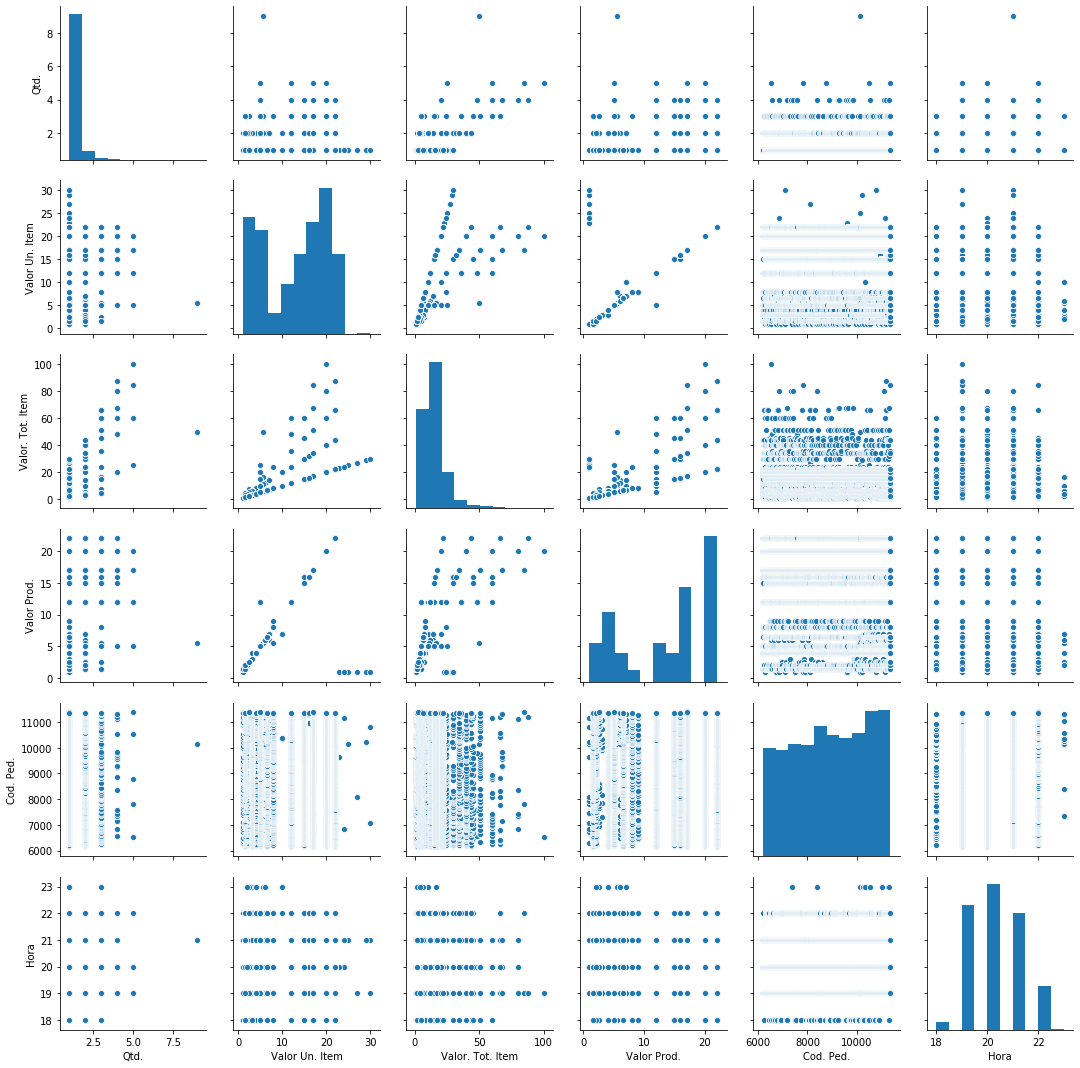

In [28]:
# Verificando com pairplot as variaveis para analisar e setar um alvo
sns.pairplot(df)

# Criando alguns gráficos

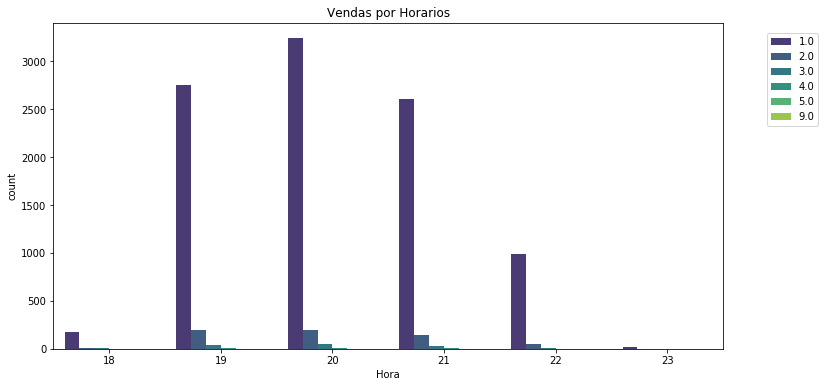

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x="Hora", hue="Qtd.", data=df, palette ="viridis")
plt.title("Vendas por Horarios")
plt.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=1)

In [ ]:
# A demanda de pedidos se concentra nos horários de 18:40 +ou- chegando até 20:40

Text(0.5, 1.0, 'Volume de Pedidos por Mês')

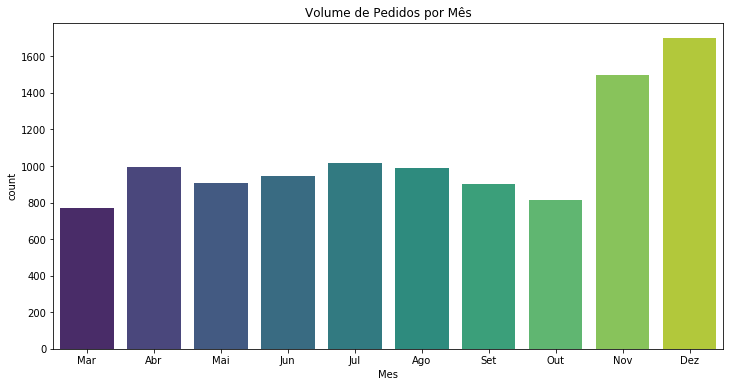

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x="Mes", data=df, palette ="viridis")
plt.title("Volume de Pedidos por Mês")


In [ ]:
# Existe um padrão nos meses com relação as vendas de Hamburgueres, Novembro e Dezembro subiram consideravelmente

Text(0.5, 1.0, 'Vendas por Dias da Semana')

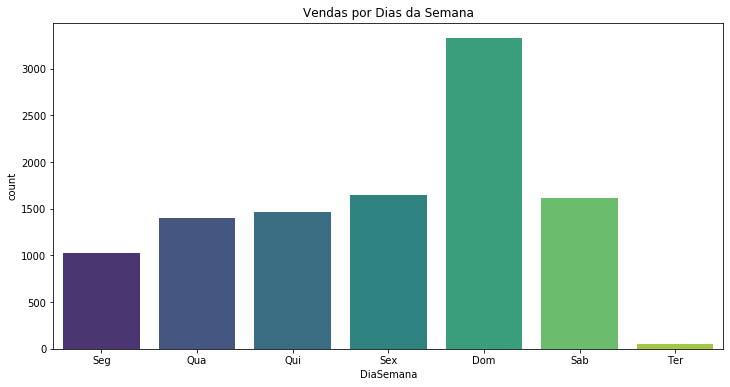

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x="DiaSemana", data=df, palette ="viridis")
plt.title("Vendas por Dias da Semana")


In [ ]:
# Apesar de não estarem em ordem, podemos perceber que existe um crescimento escalar no início da semana
# até domingo, sendo ele o maior dia de vendas de Hamburgueres

Text(0.5, 1.0, 'Por Tipo de Pedido')

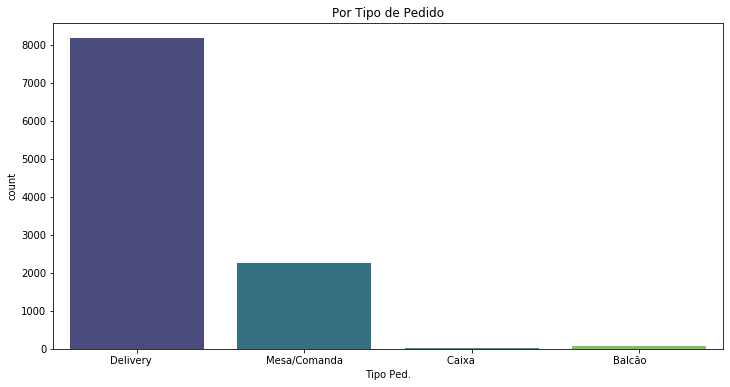

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x="Tipo Ped.",data=df, palette ="viridis")
plt.title("Por Tipo de Pedido")


In [ ]:
# Como podemos ver, DELIVERY é o meio mais rentável para a Hamburgueria 207, mesmo com loja física. O interessante seria
# trabalhar apenas com aplicativo de delivery, assim livraria o proprietário de despesas e custos.

In [44]:
# Em percentual

df["Tipo Ped."].value_counts() / 100

Delivery        81.77
Mesa/Comanda    22.67
Balcão           0.80
Caixa            0.08
Name: Tipo Ped., dtype: float64

Text(0.5, 1.0, 'Histograma das Categorias')

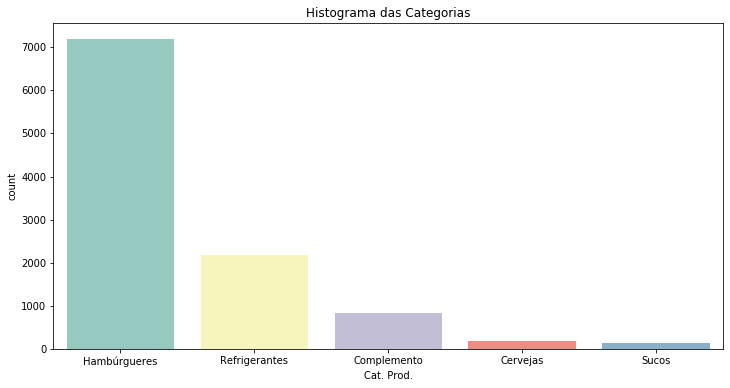

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x="Cat. Prod.", data=df, palette="Set3")
plt.title("Histograma das Categorias")

In [ ]:
# Os hamburgueres estão saindo sem refrigerantes, a venda é concentrada apenas neles mesmos.

Text(0.5, 1.0, 'Venda por Hamburguer')

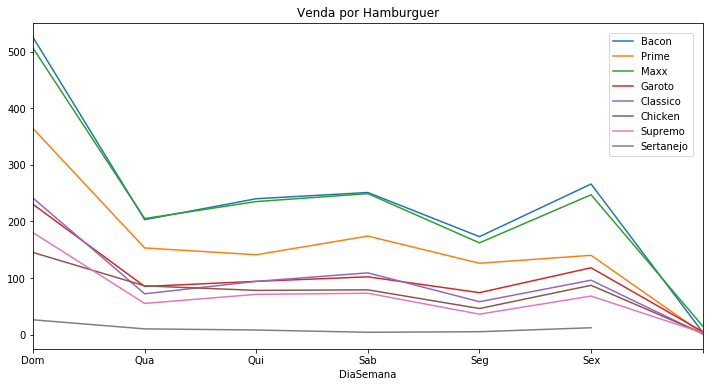

In [57]:
plt.figure(figsize=(12,6))
df[df['Nome Prod.']=='207 +BACON'].groupby('DiaSemana').count()['Cat. Prod.'].plot()
df[df['Nome Prod.']=='207 PRIME'].groupby('DiaSemana').count()['Cat. Prod.'].plot()
df[df['Nome Prod.']=='207 MAXX'].groupby('DiaSemana').count()['Cat. Prod.'].plot()
df[df['Nome Prod.']=="207 GAROTO"].groupby("DiaSemana").count()["Cat. Prod."].plot()
df[df['Nome Prod.']=="207 CLÁSSICO"].groupby("DiaSemana").count()["Cat. Prod."].plot()
df[df['Nome Prod.']=="207 CHICKEN"].groupby("DiaSemana").count()["Cat. Prod."].plot()
df[df['Nome Prod.']=="207 SUPREMO"].groupby("DiaSemana").count()["Cat. Prod."].plot()
df[df['Nome Prod.']=="207 SERTANEJO"].groupby("DiaSemana").count()["Cat. Prod."].plot()
plt.legend(["Bacon", "Prime", "Maxx", "Garoto", "Classico", "Chicken","Supremo", "Sertanejo"], loc = 0, borderaxespad=1)
plt.title("Venda por Hamburguer")